# Task 2 - Prediction using Unsupervised ML
- From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

- Author: Jonathan Rai

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### EDA - Exploratory Data Analysis 

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Checking the duplicate values

In [6]:
df.duplicated().sum()

3

- Checking missing values

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- Crosstab

In [9]:
species_dist = pd.crosstab(index=df["species"], columns="Counts")
species_dist

col_0,Counts
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


- Mixed plot

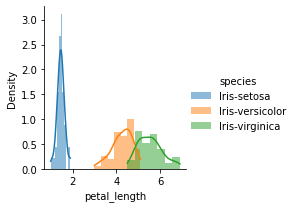

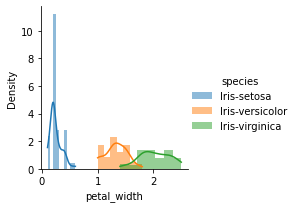

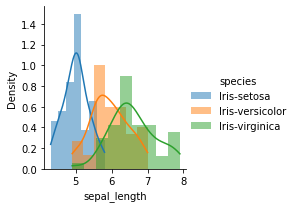

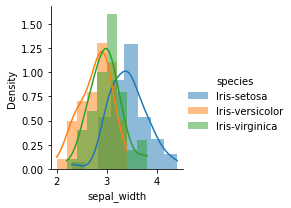

In [14]:
sns.FacetGrid(df,hue="species",height=3).map(sns.histplot, "petal_length", label="100% Equities", kde=True, stat="density", linewidth=0).add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.histplot, "petal_width", label="100% Equities", kde=True, stat="density", linewidth=0).add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.histplot, "sepal_length",  label="100% Equities", kde=True, stat="density", linewidth=0).add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.histplot,"sepal_width",  label="100% Equities", kde=True, stat="density", linewidth=0).add_legend()
plt.show()

- Pair plot

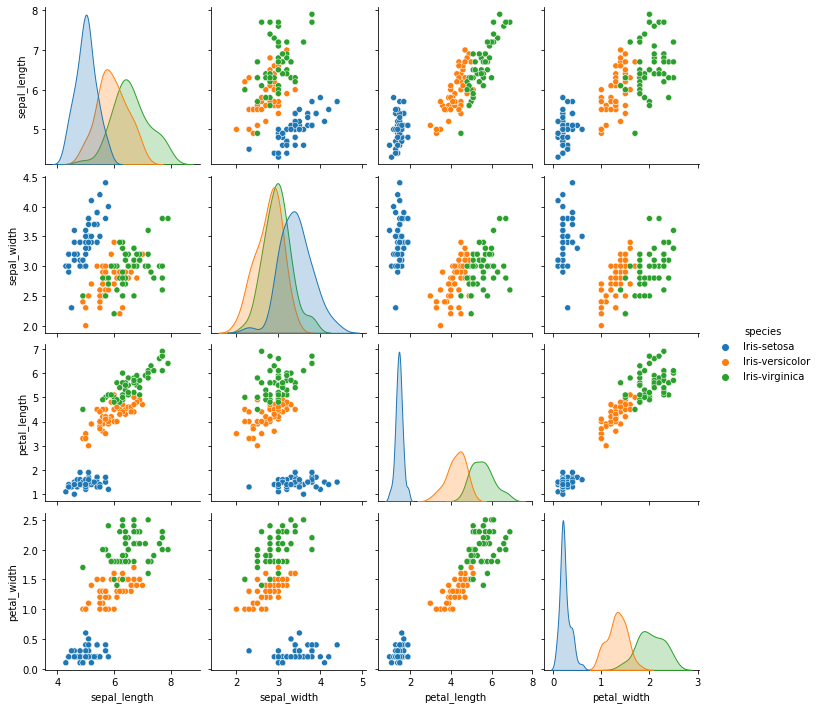

In [15]:
sns.pairplot(df, hue="species");

- Data Spliting & Model Fitting

In [16]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [17]:
x[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

- K-Means Clustering
For this unsupervise ML problem, we are using K-Means Clustering Algorithm for dividing whole data into different cluseters. Main Challange for K-Means Clustering is to determine the Number of Clusters to be formed.

- For Determing no. of clusters to be formed, we have two methods.

    i) Elbow Method.

    ii) Silhouette Method.

- Elbow Method
- For this task, i'm using Elbow Method for determing Number of Clusters i.e Value of K, to be formed.

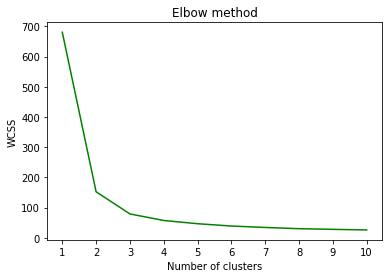

In [18]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, c="green")
plt.xticks(range(1, 11, 1))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within Cluster Sum of Squares (WCSS)
plt.show()

- Model Fitting & Cluster Formation:

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_preds = kmeans.fit_predict(x)

- Visualising the clusters

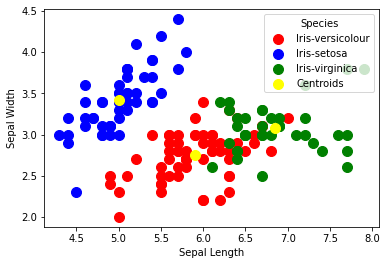

In [20]:
plt.scatter(x[y_preds == 0, 0], x[y_preds == 0, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_preds == 1, 0], x[y_preds == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_preds == 2, 0], x[y_preds == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel("Sepal Length")

plt.ylabel("Sepal Width")
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(title="Species");

- Making Prediction on Unseen Data

In [22]:
Cluster = ['Iris-Versicolur', 'Iris-Setosa', 'Iris-virginica']
cluster = kmeans.predict([[6.2, 2.2, 4.1, 1.2]])
print(cluster)
Cluster[cluster[0]]

[0]


'Iris-Versicolur'